### The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2021 Semester 2

## Assignment 1

**Student Name:**  Yichen Guan

**Student ID:**    ********

This iPython notebook is a template which you should use for your Assignment 1 submission. This file should be submitted at the **Assignment 1: Code** link on the LMS, along with any images needed to run your code.

In addition to this file, you should submit a writren report explaining your results at the **Assignment 1: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. Mapping between world and image coordinates
Note: Writing code for this question is optional. However, if you do not include code here you *must* show your computation steps in your written report.

In [2]:
import cv2
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

rootpath='./'
assignment_img= cv2.imread(os.path.join(rootpath, "Asst1_1_image.jpg"))

In [3]:
#get image heigh,width,channel
assignment_img.shape

(1000, 1500, 3)

In [4]:
#Center point coordinates
full_heigh = 1000
full_width = 1500
center_point= np.array([full_heigh/2,full_width/2])

center_point

array([500., 750.])

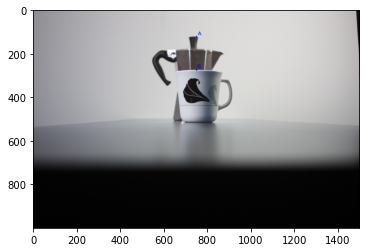

In [5]:
plt.imshow(assignment_img) 

### 2. Secret messages with bandpass filters

1：upload images and resize

In [6]:
rootpath = './'
cover_img = cv2.imread(os.path.join(rootpath, "cover.jpg"),cv2.IMREAD_GRAYSCALE)
message_img = cv2.imread(os.path.join(rootpath, "message.jpg"),cv2.IMREAD_GRAYSCALE)

In [7]:
cover_img.shape

(3870, 5856)

In [8]:
message_img.shape

(4032, 3024)

In [9]:
resize_cover= cv2.resize(cover_img, (500,500),interpolation = cv2.INTER_NEAREST)
resize_message= cv2.resize(message_img, (500,500),interpolation = cv2.INTER_NEAREST)

In [10]:
#code from week2 tutorial

def imshow(image, *args, **kwargs):
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion since 
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
      # Height, width - must be grayscale
      # convert to RGB, since matplotlib will plot in a weird colormap (instead of black = 0, white = 1)
      image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Draw the image
    plt.imshow(image, *args, **kwargs)
    # We'll also disable drawing the axes and tick marks in the plot, since it's actually an image
    plt.axis('off')
    # Make sure it outputs
    plt.show()

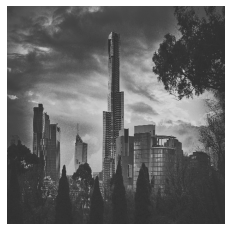

(500, 500)

In [11]:
imshow(resize_cover) 
resize_cover.shape

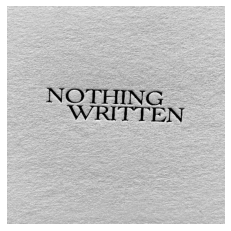

(500, 500)

In [12]:
imshow(resize_message) 
resize_message.shape

In [13]:
# Fourier transform for message
f_m = np.fft.fft2(resize_message)
f_m = np.fft.fftshift(f_m)
f_m.shape[0]


500

In [14]:
# Fourier transform for cover
f_c = np.fft.fft2(resize_cover)
f_c = np.fft.fftshift(f_c)
f_c.shape[0]


500

In [15]:
#circle = [(250-x, 250-y) for x in range(-10, 10) for y in range(-10, 10) if x**2 + y**2 <= 10**2]

In [16]:
def low_pass(f,radius):
    m = f.shape[0]
    n = f.shape[1]
    #print(m)
    #print(n)   
    mask = np.zeros((m, n))
    x0 = np.floor(m/2)
    y0 = np.floor(n/2)  
    #print(x0)
    #print(y0)
    
    for i in range(m):
        for j in range(n):
            dis = np.sqrt((i - x0)**2 + (j - y0)**2)
            if (dis <= radius):
                mask[i][j] = 1
            else:
                mask[i][j]= 0
    
    result = np.multiply(f, mask) 
    return result,mask
        
    

In [17]:
def high_pass(f,radius):
    m = f.shape[0]
    n = f.shape[1]
    #print(m)
    #print(n)
    mask = np.zeros((m, n))
    x0 = np.floor(m/2)
    y0 = np.floor(n/2)
    #print(x0)
    #print(y0)

    for i in range(m):
        for j in range(n):
            dis = np.sqrt((i - x0)**2 + (j - y0)**2)
            if (dis <= radius):
                mask[i][j] = 0
            else:
                mask[i][j]= 1
    
    result = np.multiply(f, mask) 
    return result,mask
        
    

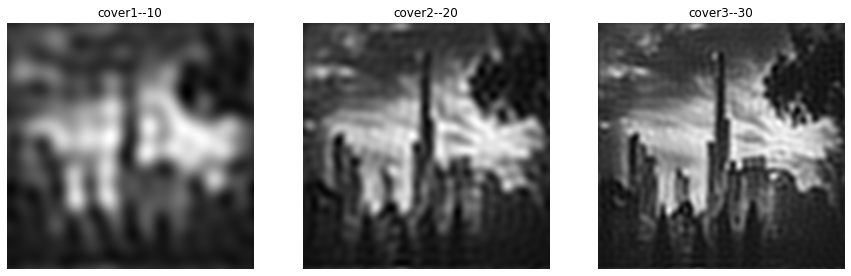

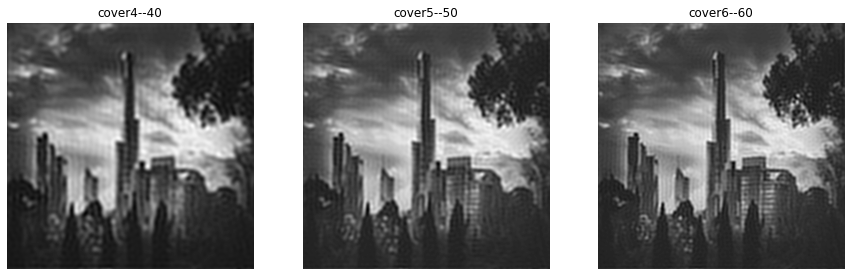

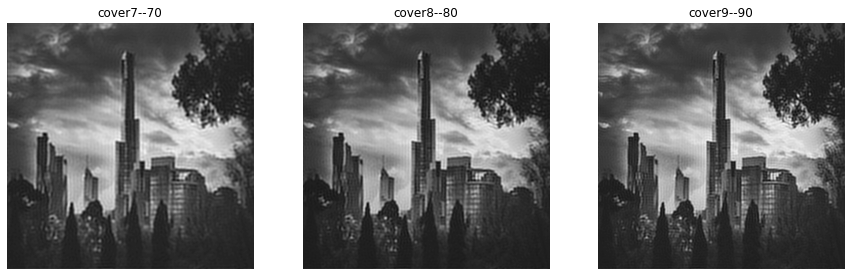

In [18]:
cover_low_filtered1,cover_mask_low1 = low_pass(f_c,10)
cover_low_filtered2,cover_mask_low2 = low_pass(f_c,20)
cover_low_filtered3,cover_mask_low3 = low_pass(f_c,30)
cover_low_filtered4,cover_mask_low4 = low_pass(f_c,40)
cover_low_filtered5,cover_mask_low5 = low_pass(f_c,50)
cover_low_filtered6,cover_mask_low6 = low_pass(f_c,60)
cover_low_filtered7,cover_mask_low6 = low_pass(f_c,70)
cover_low_filtered8,cover_mask_low6 = low_pass(f_c,80)
cover_low_filtered9,cover_mask_low6 = low_pass(f_c,90)


cover1 = np.real(np.fft.ifft2(np.fft.fftshift(cover_low_filtered1)))
cover2 = np.real(np.fft.ifft2(np.fft.fftshift(cover_low_filtered2)))
cover3 = np.real(np.fft.ifft2(np.fft.fftshift(cover_low_filtered3)))
cover4 = np.real(np.fft.ifft2(np.fft.fftshift(cover_low_filtered4)))
cover5 = np.real(np.fft.ifft2(np.fft.fftshift(cover_low_filtered5)))
cover6 = np.real(np.fft.ifft2(np.fft.fftshift(cover_low_filtered6)))
cover7 = np.real(np.fft.ifft2(np.fft.fftshift(cover_low_filtered7)))
cover8 = np.real(np.fft.ifft2(np.fft.fftshift(cover_low_filtered8)))
cover9 = np.real(np.fft.ifft2(np.fft.fftshift(cover_low_filtered9)))


fig,axs = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(15)
plt.subplot(1,3,1)
plt.imshow(cover1,cmap='gray')  
plt.title('cover1--10')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(cover2, cmap='gray')  
plt.title('cover2--20')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cover3, cmap='gray')  
plt.title('cover3--30')
plt.axis('off')
plt.show()



fig,axs = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(15)
plt.subplot(1,3,1)
plt.imshow(cover4,cmap='gray')  
plt.title('cover4--40')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(cover5, cmap='gray')  
plt.title('cover5--50')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cover6, cmap='gray')  
plt.title('cover6--60')
plt.axis('off')
plt.show()


fig,axs = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(15)
plt.subplot(1,3,1)
plt.imshow(cover7,cmap='gray')  
plt.title('cover7--70')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(cover8, cmap='gray')  
plt.title('cover8--80')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cover9, cmap='gray')  
plt.title('cover9--90')
plt.axis('off')
plt.show()



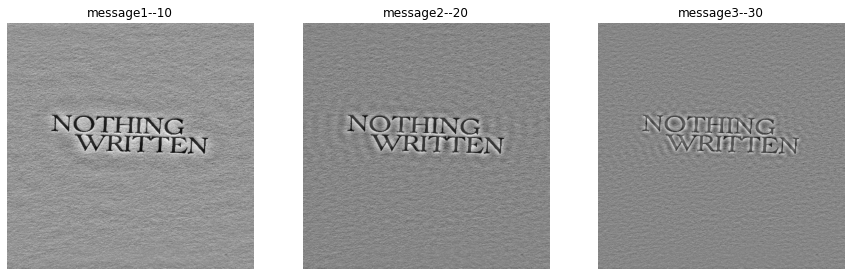

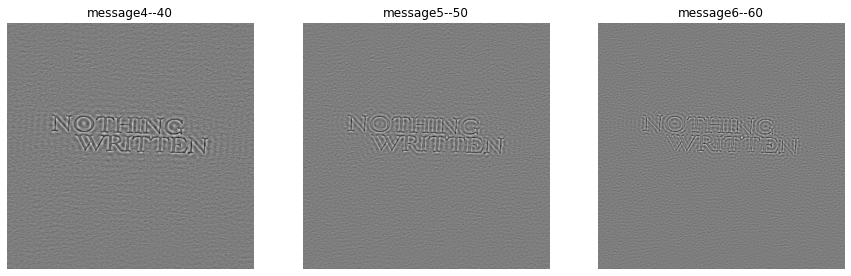

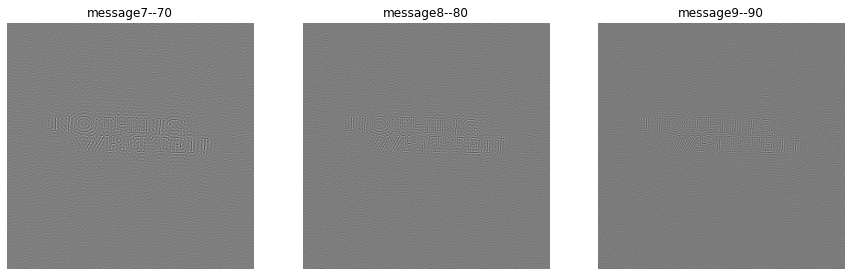

In [19]:
message_high_filtered1,message_mask_high1 = high_pass(f_m,10)
message_high_filtered2,message_mask_high2 = high_pass(f_m,20)
message_high_filtered3,message_mask_high3 = high_pass(f_m,30)
message_high_filtered4,message_mask_high4 = high_pass(f_m,40)
message_high_filtered5,message_mask_high5 = high_pass(f_m,50)
message_high_filtered6,message_mask_high6 = high_pass(f_m,60)
message_high_filtered7,message_mask_high6 = high_pass(f_m,70)
message_high_filtered8,message_mask_high6 = high_pass(f_m,80)
message_high_filtered9,message_mask_high6 = high_pass(f_m,90)



message1 = np.real(np.fft.ifft2(np.fft.fftshift(message_high_filtered1)))
message2 = np.real(np.fft.ifft2(np.fft.fftshift(message_high_filtered2)))
message3 = np.real(np.fft.ifft2(np.fft.fftshift(message_high_filtered3)))
message4 = np.real(np.fft.ifft2(np.fft.fftshift(message_high_filtered4)))
message5 = np.real(np.fft.ifft2(np.fft.fftshift(message_high_filtered5)))
message6 = np.real(np.fft.ifft2(np.fft.fftshift(message_high_filtered6)))
message7 = np.real(np.fft.ifft2(np.fft.fftshift(message_high_filtered7)))
message8 = np.real(np.fft.ifft2(np.fft.fftshift(message_high_filtered8)))
message9 = np.real(np.fft.ifft2(np.fft.fftshift(message_high_filtered9)))



fig,axs = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(15)
plt.subplot(1,3,1)
plt.imshow(message1,cmap='gray')  
plt.title('message1--10')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(message2, cmap='gray')  
plt.title('message2--20')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(message3, cmap='gray')  
plt.title('message3--30')
plt.axis('off')
plt.show()



fig,axs = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(15)
plt.subplot(1,3,1)
plt.imshow(message4,cmap='gray')  
plt.title('message4--40')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(message5, cmap='gray')  
plt.title('message5--50')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(message6, cmap='gray')  
plt.title('message6--60')
plt.axis('off')
plt.show()


fig,axs = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(15)
plt.subplot(1,3,1)
plt.imshow(message7,cmap='gray')  
plt.title('message7--70')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(message8, cmap='gray')  
plt.title('message8--80')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(message9, cmap='gray')  
plt.title('message9--90')
plt.axis('off')
plt.show()




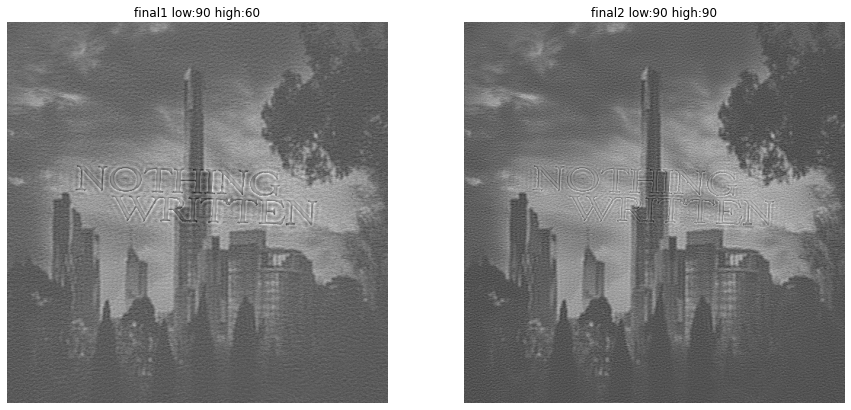

In [20]:

final1 = np.real(np.fft.ifft2(np.fft.fftshift(cover_low_filtered9+message_high_filtered6)))
final2 = np.real(np.fft.ifft2(np.fft.fftshift(cover_low_filtered9+message_high_filtered9)))

fig,axs = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(15)
plt.subplot(1,2,1)
plt.imshow(final1,cmap='gray')  
plt.title('final1 low:90 high:60')
plt.axis('off')
 

plt.subplot(1,2,2)
plt.imshow(final2, cmap='gray')  
plt.title('final2 low:90 high:90')
plt.axis('off')
plt.show()


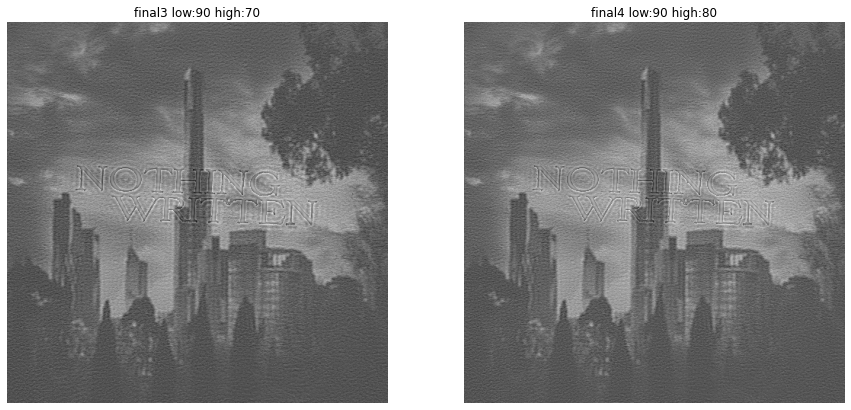

In [21]:

final3 = np.real(np.fft.ifft2(np.fft.fftshift(cover_low_filtered9+message_high_filtered7)))
final4 = np.real(np.fft.ifft2(np.fft.fftshift(cover_low_filtered9+message_high_filtered8)))

fig,axs = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(15)
plt.subplot(1,2,1)
plt.imshow(final3,cmap='gray')  
plt.title('final3 low:90 high:70')
plt.axis('off')
 

plt.subplot(1,2,2)
plt.imshow(final4, cmap='gray')  
plt.title('final4 low:90 high:80')
plt.axis('off')
plt.show()
